# Python Matplotlib Subplots with Color Lines

## Dependencies

We import the `LineCollection` object from `Matplotlib` to plot multi-segment lines along with the usual dependencies.

In [1]:
# matplotlib line collection to create segments
from matplotlib.collections import LineCollection
# matplotlib plotter
import matplotlib.pyplot as plt
# numpy
import numpy as np

## The Color Line

A line in 3D can be projected to the 2D XY-plane by marking the Z-axis data as color intensities.
We write the function `plot_segmented_color_line` to draw a single line with multiple segments.

In [2]:
def plot_segmented_color_line(axis, xs, ys, zs, cmap='Reds', cmap_min=0, cmap_max=1):
    """Function to plot a single line with multiple colored segments.

    Parameters
    ----------
    axis : :class:`matplotlib.axes.Axis`
        Axis of the current plot.
    xs : list
        X-axis values.
    ys : list
        Y-axis values.
    zs : list
        Z-axis values.
    cmap : str, optional
        Matplotlib color map. Default is "Reds".
    cmap_min : float, optional
        Minimum value of color map.
    cmap_max : float, optional
        Maximum value of color map.
    
    Returns
    -------
    line : :class:`matplotlib.collections.LineCollection`
        Matplotlib line collection.
    """

    # validate parameters
    # supported color maps
    supported_cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
    # default to "Reds" color map if not supported
    if cmap not in supported_cmaps:
        cmap = 'Reds'

    # list of points as pairs of X-axis and Y-axis values
    _points = np.array([xs, ys]).transpose()
    # segments connecting consecutive points about the second axis
    _segments = np.concatenate([_points[:-1], _points[1:]], axis=1).reshape(-1, 2, 2)

    # line collection for the segments
    line_coll = LineCollection(_segments, cmap=cmap)
    # set color for each segment
    line_coll.set_array(np.array(zs[1:]))
    # set maximum and minimum values
    line_coll.set_clim(cmap_min, cmap_max)
    # line concatenating the collection
    line = axis.add_collection(line_coll)

    # scatter plot
    axis.scatter(xs, ys, c=zs, cmap=cmap, vmin=cmap_min, vmax=cmap_max)

    return line

Let's test this function for a simple 2D plot!

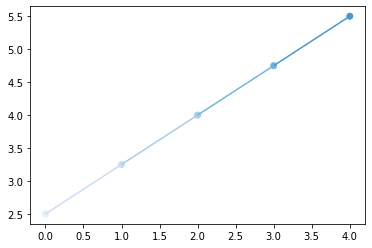

In [3]:
# generate linear data with same dimensions
xs = np.linspace(0.0, 4.0, 5)
ys = np.linspace(2.5, 5.5, 5)
zs = np.linspace(0.1, 0.6, 5)
# plot in current axis with "Blues" colormap
plot_segmented_color_line(plt.gca(), xs, ys, zs, 'Blues')
# show plot
plt.show()

## Formatting the Data

Next, we write a function `get_data_3D` to load data from a .txt file and format it as per our required data type.

In [4]:
def get_data_3D(filepath, columns=[0, 1, 2], data_type='float_'):
    """Function to extract the data from a file in a specified format.

    Parameters
    ----------
    filepath : str
        Relative path of the .txt file.
    columns : list, optional
        Indices of the columns for the X, Y and Z axes. Default is [0, 1, 2].
    data_type : str, optional
        Numpy data type of the values. Default is "float_".
    
    Returns
    -------
    data : list
        Lists of X-axis, Y-axis and Z-axis values.
    """

    # validate parameters
    # append extension if absent
    if len(filepath) < 3 or filepath[-4:] != '.txt':
        filepath += '.txt' 
    # chech whether all entries are integers
    assert len(columns) == 3 and sum([1 if type(col) is int else 0 for col in columns]) == 3, 'Parameter "columns" should contain 3 integers for column indices'
    # supported data types
    supported_numpy_datatypes = ['bool_', 'int_', 'intc', 'intp', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16', 'uint32', 'uint64', 'float_', 'float16', 'float32', 'float64', 'complex_', 'complex64', 'complex128']
    # default to "float_" data type if not supported
    if data_type not in supported_numpy_datatypes:
        data_type = 'float_'

    # initialize lists
    data = [list(), list(), list()]

    # open file and read all lines
    with open(filepath) as data_file:
        lines = data_file.readlines()
    # extract data from each row
    for l in lines:
        # skip headers and blank lines
        if l[0].isalpha() or l[0] == '\n':
            continue
        # split columns for each point
        point = l.split()

        # extract required columns
        for c in range(len(columns)):
            # convert to required data type
            data[c].append(getattr(np, data_type)(point[columns[c]]))

    return data

Let's test this extrator using a local data file `data_0_0.txt` placed inside `python-matplotlib-subplot-color-line_data`!

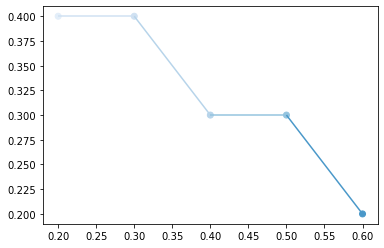

In [5]:
# extract data from local file
xs, ys, zs = get_data_3D('python-matplotlib-subplot-color-line_data/data_0_0', [0, 1, 6], 'float_')
# plot in current axis with "Blues" colormap
plot_segmented_color_line(plt.gca(), xs, ys, zs, 'Blues')
# show plot
plt.show()

## The Plotter

We write a generalized wrapper function `plot_data` which extracts axis values from local files named as `<filepath_prefix>_<subplot_number>_<line_number>.txt` and plots them in horizontally aligned subplots.

In [6]:
def plot_data(filepath_prefix, num_data_files, column_data, cmap_data, adjacent_subplots=False, show_cbar=False):
    """Function to plot data from numbered local files.

    Parameters
    ----------
    filepath_prefix : str
        Relative path with prefix of the .txt file.
    num_data_files : int or list
        Number of data files for each subplot.
    column_data : list
        Lists of indices of columns to extract for each data file.
    cmap_data : list
        Lists of color maps for each data file.
    adjacent_subplots : boolean, optional
        Option to position the subplots without gaps. Default is False.
    show_cbar : boolean, optional
        Option to display the color bar. Default is False.
    """

    # handle single subplot
    if type(num_data_files) is int:
        num_data_files = [num_data_files]
    # number of subplots
    num_subplots = len(num_data_files)

    # initialize figure
    fig, axes = plt.subplots(1, num_subplots, sharex=True, sharey=True)

    # extract all data
    all_data = [[get_data_3D(filepath_prefix + str(i) + '_' + str(j) + '.txt', column_data[i][j], 'float_') for j in range(num_data_files[i])] for i in range(num_subplots)]
    # calculate minimum and maximum values for all three axes for all subplots
    mins = np.min([np.min([np.min([all_data[i][j][k] for k in range(3)], axis=1) for j in range(num_data_files[i])], axis=0).tolist() for i in range(num_subplots)], axis=0)
    maxs = np.max([np.max([np.max([all_data[i][j][k] for k in range(3)], axis=1) for j in range(num_data_files[i])], axis=0).tolist() for i in range(num_subplots)], axis=0)

    # iteratively plot
    for i in range(num_subplots):
        axis = axes[i]
        # first axis
        for j in range(num_data_files[i]):
            # get data points
            xs, ys, zs = get_data_3D(filepath_prefix + str(i) + '_' + str(j) + '.txt', column_data[i][j], 'float_')
            # plot color line
            line = plot_segmented_color_line(axis, xs, ys, zs, cmap_data[i][j], mins[2], maxs[2])

        # update axes
        axis.set_xlim(mins[0], maxs[0])
        axis.set_ylim(mins[1], maxs[1])
        
    # make the subplots adjacent
    if adjacent_subplots:
        plt.subplots_adjust(wspace=0, hspace=0)
    # show colorbar on final axis
    if show_cbar:
        cbar = plt.colorbar(line, ax=plt.gca())
    # show figure
    plt.show()

Finally, let's put everything to work!

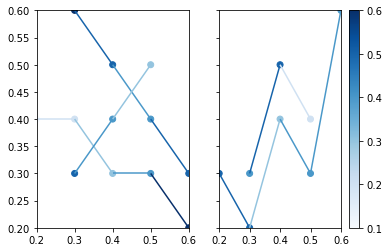

In [7]:
# relative path and prefix of the filename
filepath_prefix = 'python-matplotlib-subplot-color-line_data/data_'
# number of data files per axis
num_data_files = [3, 2]
# list of columns in each data file
# assuming files are of different structure
# should match the number of data files
column_data = [
    [[0, 1, 6], [0, 1, 5], [0, 1, 3]],
    [[0, 1, 3], [0, 1, 4]]
]
# colormap for each plot
# assuming all lines have the same color scheme
# should match the number of data files
cmap_data = [
    ['Blues', 'Blues', 'Blues'],
    ['Blues', 'Blues']
]
# call the wrapper
plot_data(filepath_prefix, num_data_files, column_data, cmap_data, False, True)